In [15]:
import numpy as np
from moonlight import *

import matplotlib.pyplot as plt

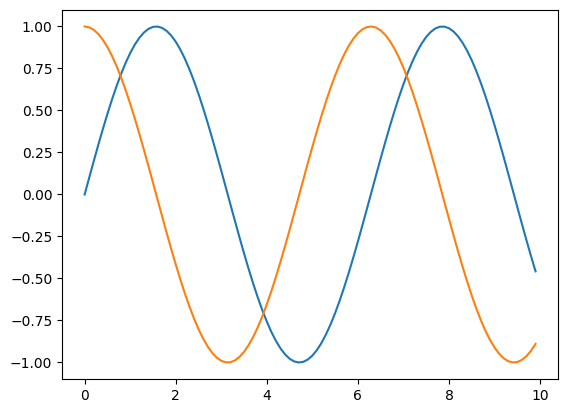

In [16]:
# Signals
time = list(np.arange(0, 10, 0.1))
time
f1, f2 = np.sin(time), np.cos(time)
f1

plt.plot(time, f1)
plt.plot(time, f2)
plt.show()

In [17]:
# Moonlight script
script = """
signal { real x; real y; }
domain boolean;
formula future = globally [0, 0.2] (x > y);
"""
moonlightScript = ScriptLoader.loadFromText(script)

In [18]:
# Moonlight monitor
monitor = moonlightScript.getMonitor("future")
values = list(zip(f1, f2))
result = monitor.monitor(time, values)
result

[[0.0, -1.0],
 [0.8, 1.0],
 [3.8, -1.0],
 [7.1000000000000005, 1.0],
 [9.700000000000001, 1.0]]

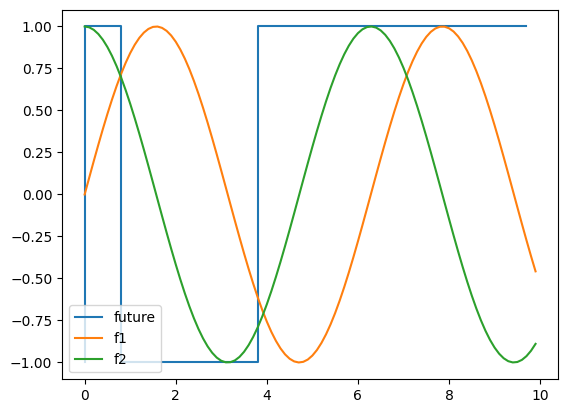

In [22]:
# plot the results
# plt.plot(time, f1)
# plt.plot(time, f2)
# times2, values2 = result.map(lambda i: (i[0], i[1]))


def extract(ls, i):
    return list(map(lambda x: x[i], ls))

times2 = extract(result, 0)
values2 = extract(result, 1)
plt.plot(times2, values2, label="future", drawstyle="steps")
plt.plot(time, f1, label="f1")
plt.plot(time, f2, label="f2")
plt.legend()
